# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# сохраним путь к файлу в строковой переменной
sessions_project_history = 'https://code.s3.yandex.net//datasets/sessions_project_history.csv'
# теперь прочитаем и сохраним его
sessions_history = pd.read_csv(sessions_project_history)
# выведем первые строки
sessions_history.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [3]:
# сохраняем user_id пользователя с макс кол-вом сессий
top_user = sessions_history.groupby('user_id')['session_id'].count().idxmax() 
# фильтруем датафрейм, оставив только одного п-ля с макс кол-вом сессий
top_user_data = sessions_history[sessions_history['user_id']==top_user] 
# выводим на экран получившийся датафрейм
top_user_data

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [4]:
# создадим сводную таблицу, в которой для каждого числа посчитаем кол-во пользвателей и кол-во зарегистрированных п-ей
dau_pivot = sessions_history.pivot_table(
    index = 'session_date',
    aggfunc = {'user_id' : 'count', # по ТЗ мы считаем, что у одного п-ля в день бывает максимум одна сессия, так что достаточно посчитать кол-во п-лей в день без доп условий
               'registration_flag' : 'sum'} # по ТЗ мы считаем, что в течение дня стутас регистрации не меняется, поэтому просто суммируем к-во зарегистрированных п-лей без доп условий
)
# сбросим индексы и переименуем столбцы
dau_pivot = dau_pivot.reset_index()
dau_pivot.columns = ['date', 'daily_registered_users', 'daily_active_users']
# поменяем порядок столбцов для лучшей логики таблицы
dau_pivot = dau_pivot.reindex(columns = ['date', 'daily_active_users', 'daily_registered_users'])
# Добавим в таблицу столбец, в котором расчитаем долю зарегистрированных п-лей
dau_pivot['frac_registered_users'] = round((dau_pivot['daily_registered_users'] / dau_pivot['daily_active_users'])*100, 2)
# выведим таблицу на экран
dau_pivot

,date,daily_active_users,daily_registered_users,frac_registered_users
0,2025-08-11,3919,169,4.31
1,2025-08-12,6056,336,5.55
2,2025-08-13,8489,464,5.47
3,2025-08-14,10321,625,6.06
4,2025-08-15,14065,840,5.97
5,2025-08-16,12205,916,7.51
6,2025-08-17,11200,833,7.44
7,2025-08-18,10839,860,7.93
8,2025-08-19,12118,831,6.86
9,2025-08-20,13514,1008,7.46


**Построим графики общего числа пользователей и общего числа зарегистрированных пользователей по дням**

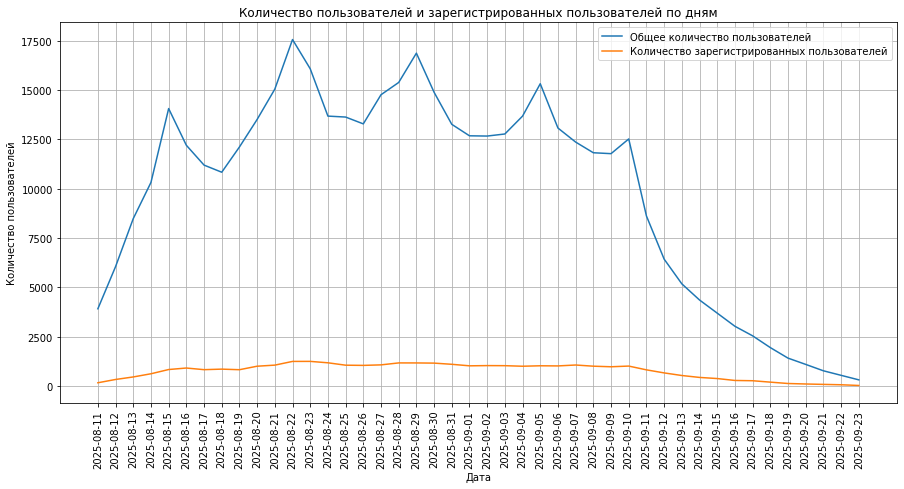

In [5]:
# Создаем фигуру
plt.figure(figsize=(15, 7))

# Создаем первый график
plt.plot(dau_pivot['date'], 
        dau_pivot['daily_active_users'], 
        label='Общее количество пользователей')

# Создаем второй график
plt.plot(dau_pivot['date'], 
        dau_pivot['daily_registered_users'], 
        label='Количество зарегистрированных пользователей')

# поворачиваем подписи по оси Х
plt.xticks(rotation=90)

# Добавляем название графика и подписи осей
plt.title('Количество пользователей и зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')

# Добавляем легенду
plt.legend()

# Включаем сетку
plt.grid()

# Отображаем графики
plt.show()

**Построим отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням**

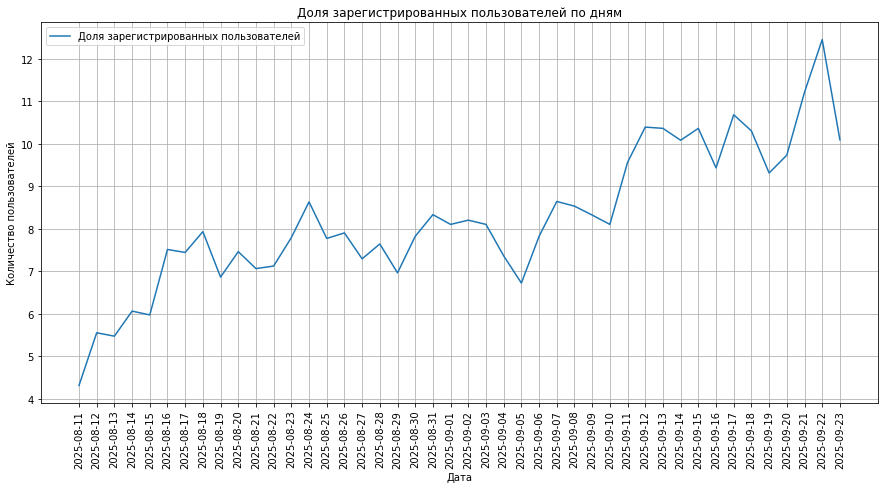

In [6]:
# Создаем фигуру
plt.figure(figsize=(15, 7))

# Создаем первый график
plt.plot(dau_pivot['date'], 
        dau_pivot['frac_registered_users'], 
        label='Доля зарегистрированных пользователей')

# поворачиваем подписи по оси Х
plt.xticks(rotation=90)

# Добавляем название графика и подписи осей
plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')

# Добавляем легенду
plt.legend()

# Включаем сетку
plt.grid()

# Отображаем графики
plt.show()

**Промежуточный вывод**

1. В количественном выражении кажется, что с 10 сентября 2025г количество регистраций уменьшается, однако в долевом соотношении к общему числу пользователей за день оно постоянно увеличивается. 
2. С 10 сентября наблюдается резкое уменьшение общего количества пользователей в день.

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [7]:
# создадим сводную таблицу, в которой для каждого числа посчитаем кол-во пользвателей и кол-во зарегистрированных п-ей
page_counter_pivot = sessions_history.pivot_table(
    index = 'page_counter',
    values = 'session_id',
    aggfunc = 'count'
)
# сбросим индексы и переименуем столбцы
page_counter_pivot = page_counter_pivot.reset_index()
page_counter_pivot.columns = ['page_counter', 'number_of_sessions']
# выведим таблицу на экран
page_counter_pivot

,page_counter,number_of_sessions
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


**Построим столбчатую диаграмму**

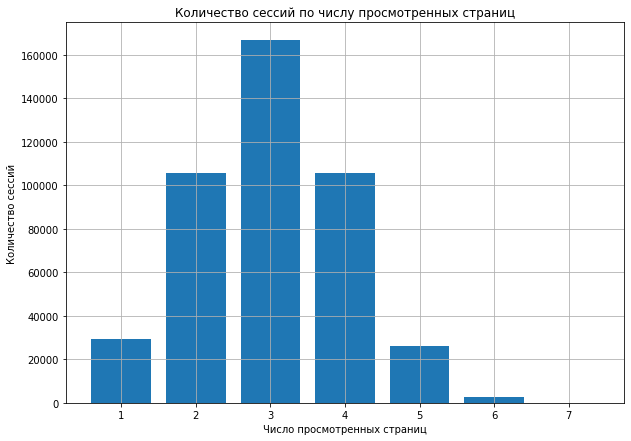

In [8]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 7))

# Строим столбчатую диаграмму
plt.bar(page_counter_pivot['page_counter'], page_counter_pivot['number_of_sessions'])

# Добавляем название графика и подписи осей
plt.title('Количество сессий по числу просмотренных страниц')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

**Промежуточный вывод**

Чаще всего в рамках одной сессии пользователи просматривают по 3 страницы.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [9]:
# Добавим новый столбец, используя лямбда-функцию
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
sessions_history.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,good_session
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone,0
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android,1
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC,1
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android,1
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android,0


In [22]:
# Создадим отдельную таблицу для построения графика
good_sessions = sessions_history.pivot_table(
    index = 'session_date',
    values = 'good_session',
    aggfunc = 'mean'
)
good_sessions =  good_sessions.reset_index()
good_sessions

,session_date,good_session
0,2025-08-11,0.312835
1,2025-08-12,0.302015
2,2025-08-13,0.306750
3,2025-08-14,0.316055
4,2025-08-15,0.304941
5,2025-08-16,0.306186
6,2025-08-17,0.317589
7,2025-08-18,0.310545
8,2025-08-19,0.312840
9,2025-08-20,0.306941


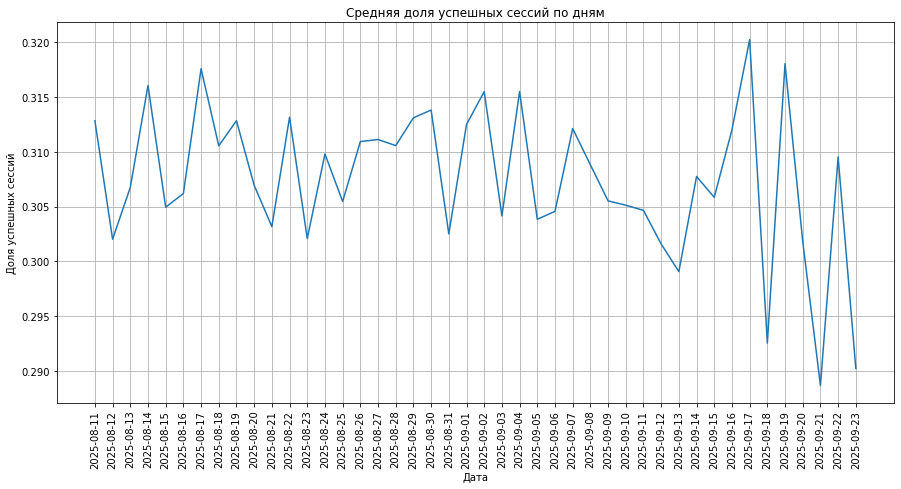

In [23]:
# Создаем фигуру
plt.figure(figsize=(15, 7))

# Создаем первый график
plt.plot(good_sessions['session_date'], 
        good_sessions['good_session'])

# поворачиваем подписи по оси Х
plt.xticks(rotation=90)

# Добавляем название графика и подписи осей
plt.title('Средняя доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')

# Включаем сетку
plt.grid()

# Отображаем графики
plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [11]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста 
mde = 0.03 # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [12]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = dau_pivot['daily_active_users'].mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size * 2 / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [13]:
# сохраним путь к файлу в строковой переменной
sessions_project_test_part = 'https://code.s3.yandex.net//datasets/sessions_project_test_part.csv'
# теперь прочитаем и сохраним его
sessions_test_part = pd.read_csv(sessions_project_test_part)
# выведем первые строки
sessions_test_part.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [15]:
# Рассчитаем кол-во пользователей в каждой группе
users_a = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].nunique()
users_b = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].nunique()
perc_dif = 100*(users_a - users_b) / users_a
display(f'Количество пользователей в группе А - {users_a}, в группе В - {users_b}')
display(f'Процентная разница количества пользователей в группах - {round(perc_dif, 2)}%')

'Количество пользователей в группе А - 1477, в группе В - 1466'

'Процентная разница количества пользователей в группах - 0.74%'

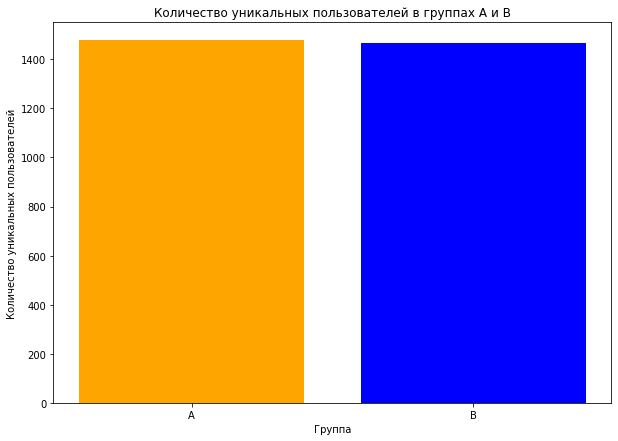

In [17]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 7))

# Строим столбчатую диаграмму
plt.bar(['A', 'B'], [users_a, users_b], color=['orange', 'blue'])

# Добавляем название графика и подписи осей
plt.title('Количество уникальных пользователей в группах А и В')
plt.xlabel('Группа')
plt.ylabel('Количество уникальных пользователей')

# Выводим график
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [18]:
# создадим множества идентификаторов пользователей в группах А и В, а затем посчитаем длину их пересечения
set_a = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique())
set_b = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique())
display(f'Количество пользователей, попавших в обе тестовые группы: {len(set_a.intersection(set_b))}')

'Количество пользователей, попавших в обе тестовые группы: 0'

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


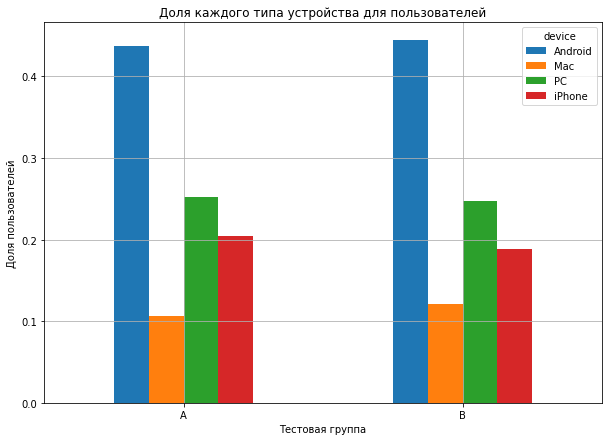

In [34]:
'''Построим две столбчатые диаграммы на одном графике, чтобы более 
наглядно показать, совпадает ли распределение устройств в группах А и В.
Для этого используем группировку по полю test_group'''

sessions_test_part.groupby('test_group')['device'].value_counts(normalize=True).unstack(fill_value=0).plot(
               kind='bar', 
               rot=0,
               legend=True,
               title=f'Доля каждого типа устройства для пользователей',
               figsize=(10, 7)
)

# Настраиваем оформление графика
plt.xlabel('Тестовая группа')
plt.ylabel('Доля пользователей')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

**Промежуточный вывод:** в целом, в обеих тестовых группах распределение по устройствам выглядит похоже: большая часть пользователей пользуется устройствами Android, наименьшая - Mac. В абсолютных значениях есть различия, однако они всё равно близки друг к другу, а также могут быть связаны с различием в размерах выборок.

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


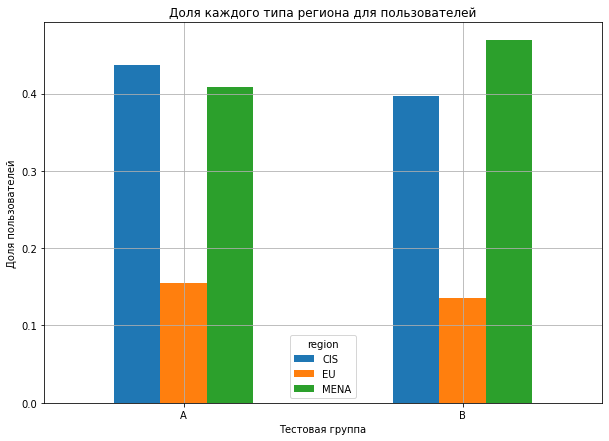

In [39]:
# Не смогла подобрать ничего более удачного, чем столбчатая диаграмма, для визуализации этой задачи
sessions_test_part.groupby('test_group')['region'].value_counts(normalize=True).unstack(fill_value=0).plot(
               kind='bar', 
               rot=0,
               legend=True,
               title=f'Доля каждого типа региона для пользователей',
               figsize=(10, 7)
)

# Настраиваем оформление графика
plt.xlabel('Тестовая группа')
plt.ylabel('Доля пользователей')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

**Промежуточный вывод:** распределение пользователей по регионам в тестовых группах различается. В группе А большинство пользователей из стран СНГ, а в группе В - из стран среднего востока и северной Африки. Доля европейских пользователей в обеих группах совпадает.

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

**Вывод по результатам проверки А/В-теста:**
1. В группе А на 0.74% больше пользователей, чем в группе В. На данный момент такое различие в выборках можно считать некритичным.
2. Пользователей, попавших в обе тестовые группы, не обнаружено.
3. Распределение пользователей по типам устройств в обеих группах совпадает.
4. Распределение пользователей по регионам в группах различается. Это может быть связано с различием в размерах выборок, однако о данной проблеме стоит дать знать разработчикам.

А/В-тест, в целом, проходит корректно, весомых причин для его остановки нет, однако стоит пересмотреть распределение пользователей по группам для более равномерного их распределения по регионам.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [40]:
# сохраним путь к файлу в строковой переменной
sessions_project_test = 'https://code.s3.yandex.net//datasets/sessions_project_test.csv'
# теперь прочитаем и сохраним его
sessions_test = pd.read_csv(sessions_project_test)
# выведем первые строки
sessions_test.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B


In [41]:
# Добавим новый столбец, используя лямбда-функцию
sessions_test['good_session'] = sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
sessions_test.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [80]:
# Рассчитаем кол-во пользователей в каждой группе
test_session_a = sessions_test[sessions_test['test_group'] == 'A'].groupby('session_date')['session_id'].nunique()
test_session_b = sessions_test[sessions_test['test_group'] == 'B'].groupby('session_date')['session_id'].nunique()

display(test_session_a, test_session_b)

session_date
2025-10-14    1502
2025-10-15    2235
2025-10-16    3280
2025-10-17    4089
2025-10-18    5013
2025-10-19    6535
2025-10-20    5837
2025-10-21    3927
2025-10-22    3083
2025-10-23    2470
2025-10-24    2090
2025-10-25    1897
2025-10-26    1669
2025-10-27    1454
2025-10-28    1279
2025-10-29    1068
2025-10-30     887
2025-10-31     644
2025-11-01     434
2025-11-02     158
Name: session_id, dtype: int64

session_date
2025-10-14    1628
2025-10-15    2283
2025-10-16    3241
2025-10-17    4054
2025-10-18    5059
2025-10-19    6779
2025-10-20    6089
2025-10-21    3981
2025-10-22    3111
2025-10-23    2548
2025-10-24    2068
2025-10-25    1814
2025-10-26    1692
2025-10-27    1517
2025-10-28    1289
2025-10-29    1131
2025-10-30     876
2025-10-31     669
2025-11-01     465
2025-11-02     160
Name: session_id, dtype: int64

In [81]:
display(f'Количество участвовавших в тесте сессий: в группе А - {test_session_a.sum()}, в группе В - {test_session_b.sum()}.')
display(f'Общее количество участвоваших в тесте сессий: {test_session_a.sum() + test_session_b.sum()}.')

'Количество участвовавших в тесте сессий: в группе А - 49551, в группе В - 50454.'

'Общее количество участвоваших в тесте сессий: 100005.'

**Проверим гипотезу:**

0. Нулевая: колличество сессий для тестовых групп одинаково
1. Альтернативная: колличество сессий для тестовых групп различается

Для проверки гипотезы используем двусторонний тест Стьюдента

In [58]:
from scipy.stats import ttest_ind

metric_a = test_session_a ## выборка целевой метрики для группы A
metric_b = test_session_b ## выборка целевой метрики для группы B

alpha = 0.05
stat_ttest, p_value_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    alternative='two-sided'
)

if p_value_ttest>alpha:
    print(f'p-value теста Стьюдента = {round(p_value_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение! Колличество сессий в группах A и B одинаково.')
else:
    print(f'p-value теста Стьюдента = {round(p_value_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Колличество сессий в группах A и B различается.')

p-value теста Стьюдента = 0.94
Нулевая гипотеза находит подтверждение! Колличество сессий в группах A и B одинаково.


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [71]:
a_good_sessions = sessions_test[sessions_test['test_group'] == 'A']['good_session'].mean()*100
b_good_sessions = sessions_test[sessions_test['test_group'] == 'B']['good_session'].mean()*100

display(f'Колличество успешных сессий в группе А - {round(a_good_sessions, 2)}%, в группе В - {round(b_good_sessions, 2)}%.')
display(f'Разница колличества успешных сессий в группах - {round(b_good_sessions - a_good_sessions, 2)}%')

'Колличество успешных сессий в группе А - 30.77%, в группе В - 31.83%.'

'Разница колличества успешных сессий в группах - 1.06%'

In [73]:
a_good_sessions = sessions_test[(sessions_test['test_group'] == 'A')&(sessions_test['good_session'] == 1)].shape[0]
b_good_sessions = sessions_test[(sessions_test['test_group'] == 'B')&(sessions_test['good_session'] == 1)].shape[0]

display(f'Колличество успешных сессий в группе А - {round(a_good_sessions, 2)}%, в группе В - {round(b_good_sessions, 2)}%.')
display(f'Разница колличества успешных сессий в группах - {round(b_good_sessions - a_good_sessions, 2)}%')

'Колличество успешных сессий в группе А - 15248%, в группе В - 16059%.'

'Разница колличества успешных сессий в группах - 811%'

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

**Проверим гипотезу:**

0. Нулевая: изменение в метрике доли успешных сессия не является статистически значимым
1. Альтернативная: изменение в метрике доли успешных сессия является статистически значимым

Для проверки гипотезы используем Z-тест

In [78]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

n_a = sessions_test[sessions_test['test_group'] == 'A'].shape[0]
n_b = sessions_test[sessions_test['test_group'] == 'B'].shape[0]

m_a = sessions_test[sessions_test['test_group'] == 'A']['good_session'].sum()
m_b = sessions_test[sessions_test['test_group'] == 'B']['good_session'].sum()

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='two-sided'
)
p_value_ztest

if p_value_ztest > alpha:
    print(f'pvalue={round(p_value_ztest, 4)} > {alpha}')
    print('Принимается нулевая гипотеза!')
    print('Интерпретация: изменение в метрике доли успешных сессия не является статистически значимым')
else:
    print(f'pvalue={round(p_value_ztest, 4)} < {alpha}')
    print('Принимается альтернативная гипотеза!')
    print('Интерпретация: изменение в метрике доли успешных сессия является статистически значимым')


pvalue=0.0003 < 0.05
Принимается альтернативная гипотеза!
Интерпретация: изменение в метрике доли успешных сессия является статистически значимым


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

**Итоговые выводы**

Характеристики проведённого А/В-теста:
1. Количество задействованных сессий: 10 005, из них в группе А - 49 551, в группе В - 50 454.
2. Длительность эксперимента: 20 дней.

В результате внедрения нового алгоритма рекомендаций доля успешных сессий выросла с 30.77% (в контрольной группе) до 31.83% (в тестовой группе). Рост ключевой метрики составил порядка 1.06%. Для оценки статистической значимости разницы значение p-value получилось равным 0.0003. По результатам проведённого А/В-теста можно предположить, что тестируемое нововведение является успешным и его можно внедрять в приложение.